# Analisis exploratorio de los datos
En este documento se muestra como unir las lecturas de los sensores del mes de enero. Estas lecturas se encuentran en los archivos *.parquet, las cuales se uniran en un solo archivo (factLecturas_fechaDeUnion). Tambien se hara el analisis exploratorio de las lecturas y de las tablas, estas tablas se uniran (sies posible) y seran usadas en el dashboard. 

## Lectura y union de los archivos *.parquet

In [56]:
# Import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import os

In [57]:
path = '../data/raw/Lecturas_Eneero_2025'
content = os.listdir(path)
files = []
no_empty = []
# Create DataFrame
df = pd.DataFrame(
{
    'ReadId': [],
    'TimeSpan': [],
    'SensorId': [],
    'Value': [],
    'LocalTimeSpan': [],
})

for folder in content:
    if folder.endswith(''):
        path_files = os.path.join(path,folder)
        for file in os.listdir(path_files):
            if file.endswith('parquet'):
                files.append(file)
                try:
                    df_1 = pd.read_parquet(os.path.join(path_files,file))
                    df = pd.concat([df,df_1])
                    no_empty.append(file)
                except OSError:
                    pass

df = df.reset_index(drop=True)        
print(f"Total files (*.parquet) found: {len(files)}, Total non-empty files: {len(no_empty)}")

Total files (*.parquet) found: 7492, Total non-empty files: 5173


## Analisis exploratorio de los datos
### Lecturas de los sensores

In [58]:
# DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165411 entries, 0 to 165410
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ReadId         165411 non-null  object        
 1   TimeSpan       165411 non-null  datetime64[ns]
 2   SensorId       165411 non-null  object        
 3   Value          165411 non-null  float64       
 4   LocalTimeSpan  165411 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(2)
memory usage: 6.3+ MB


No hay valores ausentes y las columnas tienen el formato adecuado.

In [59]:
# Show DataFrame
df.head(3)

,ReadId,TimeSpan,SensorId,Value,LocalTimeSpan
0,05543cf3-ec51-4760-a9af-8efa01a203e6,2025-01-18 13:48:44.190,063276ed-657e-40a2-a17b-0c685af518f6,31.20,2025-01-18 07:48:44.190
1,a3c80788-c698-41cc-835f-aedd98adb72c,2025-01-18 13:48:44.195,22f8b472-4022-41a9-b7b7-37e83a532df0,35.55,2025-01-18 07:48:44.195
2,4e223d79-4791-4c2a-9d88-97c8efa170bc,2025-01-18 13:48:44.199,267e3d44-9b7f-460c-b34b-603fe0fa9972,36.90,2025-01-18 07:48:44.199


Veamos cuantos valores diferentes hay en las columnas 'ReadId' y 'SensorId'.

In [60]:
# Count unique values
print(df['ReadId'].nunique())

165407


In [61]:
# Count unique values
print(df['SensorId'].nunique())

40


A continuación se muestra la distribucion de los valores medidos.

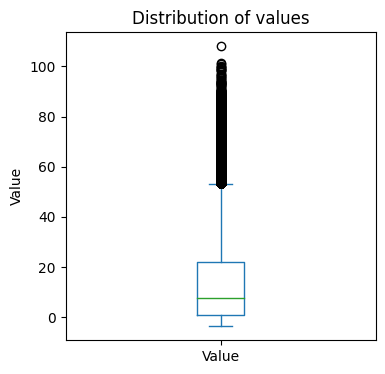

In [62]:
# Box plot
df['Value'].plot(kind='box', figsize=[4,4], title='Distribution of values',
                 ylabel='Value')
plt.xticks(rotation=0)
plt.show()

## Analisis exploratorio de las tablas
Se realizara el mismo analisis mostrado en la seccion anterior. Algunas columnas se renombraran.

In [63]:
# Read DataFrame
df_cities = pd.read_csv('../data/raw/dimCities.csv',sep=',',header=0)

# Show DataFrame
df_cities.head(2)

,CityId,StateId,Name
0,761AC964-F254-4E4B-0865-08DC439261D4,E30541D0-B009-4D73-E19A-08DC43924EB2,Chihuahua
1,5A5E32BC-B4B6-4496-DD37-08DD421CD4D1,E30541D0-B009-4D73-E19A-08DC43924EB2,Juárez


In [64]:
# Rename column
df_cities = df_cities.rename(columns={'Name':'CityName'})

# DataFrame information
df_cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   CityId    3 non-null      object
 1   StateId   3 non-null      object
 2   CityName  3 non-null      object
dtypes: object(3)
memory usage: 200.0+ bytes


In [65]:
# Read DataFrame
df_devices = pd.read_csv('../data/raw/dimDevices.csv',sep=',',header=0)

# Show DataFrame
df_devices.head(2)

,DeviceId,DeviceTyId,SubLocationId,Name,Active,ModelId,CreatedAt,ModifiedAt
0,9D5E9B81-70CE-4DD6-90D0-006F7DA796FA,C48A1D4F-664C-4863-2555-08DD462F6DF2,9F33CBEA-6D72-4E8A-615F-08DD5B605483,Cuarto de Congelación,1,D4E53753-7F96-4124-26BD-08DC43962801,2025-03-06 14:52:11.4632359,2025-03-06 14:52:11.4632359
1,ED5B45ED-142D-4B09-B7A7-0349360AEA32,0373D9FC-85A2-4324-5940-08DC84AC4EC2,8C213D36-9843-4DDC-5573-08DDDE84D8AA,Alumbrado Exterior,1,A3799BB1-C2E1-4E07-95A0-08DC84A8A9D2,2025-08-19 18:45:10.2321111,2025-08-19 18:45:10.2321111


In [66]:
# Rename column
df_devices = df_devices.rename(columns={'Name':'DeviceName','Active':'DeviceActive'})

# DataFrame information
df_devices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DeviceId       110 non-null    object
 1   DeviceTyId     110 non-null    object
 2   SubLocationId  110 non-null    object
 3   DeviceName     110 non-null    object
 4   DeviceActive   110 non-null    int64 
 5   ModelId        110 non-null    object
 6   CreatedAt      110 non-null    object
 7   ModifiedAt     110 non-null    object
dtypes: int64(1), object(7)
memory usage: 7.0+ KB


In [67]:
# Read DataFrame
df_locations = pd.read_csv('../data/raw/dimLocations.csv',sep=',',header=0)

# Show DataFrame
df_locations.head(2)

,LocationId,CityId,Longitude,Latitude,Name,TimeZone,Active,CreatedAt,ModifiedAt
0,3D88CBEA-06B9-4463-13B3-08DC43934FB8,761AC964-F254-4E4B-0865-08DC439261D4,-106.110813,28.622254,Juventud,America/Chihuahua,1,2024-03-13 19:25:15.7995493,2024-03-13 19:25:15.7995493
1,1A37FA41-9850-4CE5-A2E7-08DD3FD912C4,761AC964-F254-4E4B-0865-08DC439261D4,-106.101751,28.658306,Américas,America/Chihuahua,1,2025-01-28 20:19:31.2113749,2025-01-28 20:19:31.2113749


In [68]:
# Rename columns
df_locations = df_locations.rename(columns={'Name':'LocationName','Active':'LocationActive'})

# DataFrame information
df_locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LocationId      10 non-null     object 
 1   CityId          10 non-null     object 
 2   Longitude       10 non-null     float64
 3   Latitude        10 non-null     float64
 4   LocationName    10 non-null     object 
 5   TimeZone        10 non-null     object 
 6   LocationActive  10 non-null     int64  
 7   CreatedAt       10 non-null     object 
 8   ModifiedAt      10 non-null     object 
dtypes: float64(2), int64(1), object(6)
memory usage: 848.0+ bytes


In [69]:
# Read DataFrame
df_sensors = pd.read_csv('../data/raw/dimSensors.csv',sep=',',header=0)

# Show DataFrame
df_sensors.head(4)

,SensorId,SensorTyId,DeviceId,ModelId,Name,Active,CreatedAt,ModifiedAt
0,A96B8CC1-EE11-4B23-8ED4-009716582C64,9D7377E0-82EC-49C1-A1BD-08DC4397766E,32E2C47E-D9A7-4B90-85BF-A049537A3B85,683A07C0-2667-4561-A6CC-08DDF2109451,Fase 2,1,2025-09-12 16:27:36.1554194,2025-09-12 16:27:36.1554194
1,2F2E7360-BB5B-406A-A346-015C7E0C3C16,8DCFFF66-4B0E-42A0-26B4-08DC84ADECD9,CF92A35A-0B92-4DFA-A9EA-8A54150DDACD,0440E616-A780-45C1-95A1-08DC84A8A9D2,Cisterna Agua Interna,0,2025-02-07 20:13:16.3037102,2025-08-12 20:34:48.5357274
2,8CF875D9-4FE4-49C2-9A3B-019634A33710,5485A1F6-3775-436F-A1B9-08DC4397766E,724834F5-B593-4E6C-9C7B-B3E017025318,74990137-5845-4ECF-9156-08DD49F97E9E,Temperatura,0,2025-03-21 20:39:47.4869394,2025-08-13 19:16:46.3381574
3,A7A50B5F-664F-4EDD-BE90-01B03D3DA82D,A10313E6-4D60-4C90-26B5-08DC84ADECD9,490C7206-8705-444F-ADCD-1E7591222F29,A3799BB1-C2E1-4E07-95A0-08DC84A8A9D2,Switch 2,1,2025-04-10 22:00:29.5395765,2025-04-10 22:00:29.5395765


In [70]:
# Rename columns
df_sensors = df_sensors.rename(columns={'Name':'SensorName','Active':'SensorActive'})

# DataFrame information
df_sensors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SensorId      312 non-null    object
 1   SensorTyId    312 non-null    object
 2   DeviceId      312 non-null    object
 3   ModelId       312 non-null    object
 4   SensorName    312 non-null    object
 5   SensorActive  312 non-null    int64 
 6   CreatedAt     312 non-null    object
 7   ModifiedAt    312 non-null    object
dtypes: int64(1), object(7)
memory usage: 19.6+ KB


In [71]:
# Read DataFrame
df_sublocations = pd.read_csv('../data/raw/dimSublocations.csv',sep=',',header=0)

# Show DataFrame
df_sublocations.head(2)

,SubLocationId,LocationId,SubLocationTyId,Name,Active,CreatedAt,ModifiedAt
0,C7397134-6D3F-4FB3-34A8-08DC43941E6D,3D88CBEA-06B9-4463-13B3-08DC43934FB8,AB7D11A8-2F18-44CF-449B-08DC43939793,Comedor 1,1,2024-03-13 19:31:02.5444210,2024-03-13 19:31:02.5444210
1,271DC565-7852-4372-34A9-08DC43941E6D,3D88CBEA-06B9-4463-13B3-08DC43934FB8,504235CA-6D9A-42F5-449C-08DC43939793,Cocina 1,1,2024-03-13 19:32:01.2323636,2024-03-13 19:32:01.2323636


In [72]:
# Rename columns
df_sublocations = df_sublocations.rename(columns={'Name':'SubLocationName','Active':'SubLocationActive'})

# DataFrame information
df_sublocations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SubLocationId      170 non-null    object
 1   LocationId         170 non-null    object
 2   SubLocationTyId    170 non-null    object
 3   SubLocationName    170 non-null    object
 4   SubLocationActive  170 non-null    int64 
 5   CreatedAt          170 non-null    object
 6   ModifiedAt         170 non-null    object
dtypes: int64(1), object(6)
memory usage: 9.4+ KB


In [73]:
# Read DataFrame
df_unidades = pd.read_csv('../data/raw/dimUnidades.csv',sep=',',header=0)

# Show DataFrame
df_unidades.head(4)

,SensorTyId,Name,UnitName,UnitAbbreviation,Active,CreatedAt
0,5485A1F6-3775-436F-A1B9-08DC4397766E,Temperatura,Centigrados,°C,1,2024-03-13 19:54:58.6955197
1,279BB078-A028-45C7-A1BA-08DC4397766E,Humedad,Porciento,%,1,2024-03-13 19:56:38.9516445
2,9ABA7228-87EF-482A-A1BB-08DC4397766E,Estado,Estado,Estado,1,2024-03-13 19:57:14.3865246
3,32091EAA-4460-4814-A1BC-08DC4397766E,Nivel,Centimetros,cm,1,2024-03-13 20:02:20.6375520


In [74]:
# Rename columns
df_unidades = df_unidades.rename(columns={'Name':'MeasureName','Active':'UnitActive'})

# DataFrame information
df_unidades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SensorTyId        12 non-null     object
 1   MeasureName       12 non-null     object
 2   UnitName          12 non-null     object
 3   UnitAbbreviation  12 non-null     object
 4   UnitActive        12 non-null     int64 
 5   CreatedAt         12 non-null     object
dtypes: int64(1), object(5)
memory usage: 704.0+ bytes


Para todas las tablas, se observa que no tienen valores nulos y el formato de los datos es el correcto.

### Combinacion de tablas

Se procede a unir las tablas 'factLecturas', 'dimSensors', 'dimUnidades' y 'dimDevices'.

In [75]:
# Show column names
print(df.columns)
print(df_sensors.columns)
print(df_unidades.columns)
print(df_devices.columns)

Index(['ReadId', 'TimeSpan', 'SensorId', 'Value', 'LocalTimeSpan'], dtype='object')
Index(['SensorId', 'SensorTyId', 'DeviceId', 'ModelId', 'SensorName',
       'SensorActive', 'CreatedAt', 'ModifiedAt'],
      dtype='object')
Index(['SensorTyId', 'MeasureName', 'UnitName', 'UnitAbbreviation',
       'UnitActive', 'CreatedAt'],
      dtype='object')
Index(['DeviceId', 'DeviceTyId', 'SubLocationId', 'DeviceName', 'DeviceActive',
       'ModelId', 'CreatedAt', 'ModifiedAt'],
      dtype='object')


In [76]:
# Extract DataFrame columns
df_sensors = df_sensors[['SensorId','SensorTyId','DeviceId','SensorName','SensorActive']]
df_unidades = df_unidades[['SensorTyId','MeasureName','UnitName','UnitAbbreviation']]
df_devices = df_devices[['DeviceId','SubLocationId','DeviceName']]

In [77]:
# Merge DataFrames
df1 = df.merge(df_sensors,on='SensorId',how='left')

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165411 entries, 0 to 165410
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ReadId         165411 non-null  object        
 1   TimeSpan       165411 non-null  datetime64[ns]
 2   SensorId       165411 non-null  object        
 3   Value          165411 non-null  float64       
 4   LocalTimeSpan  165411 non-null  datetime64[ns]
 5   SensorTyId     0 non-null       object        
 6   DeviceId       0 non-null       object        
 7   SensorName     0 non-null       object        
 8   SensorActive   0 non-null       float64       
dtypes: datetime64[ns](2), float64(2), object(5)
memory usage: 11.4+ MB


**Nota:** Las tablas 'factLecturas' y 'dimSensors' no tienen valores en comun respecto a la columna 'SensorId', por lo tanto, no seran combinadas.

In [78]:
# Merge DataFrames
df2 = df_sensors.merge(df_unidades,on='SensorTyId',how='left')

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SensorId          312 non-null    object
 1   SensorTyId        312 non-null    object
 2   DeviceId          312 non-null    object
 3   SensorName        312 non-null    object
 4   SensorActive      312 non-null    int64 
 5   MeasureName       312 non-null    object
 6   UnitName          312 non-null    object
 7   UnitAbbreviation  312 non-null    object
dtypes: int64(1), object(7)
memory usage: 19.6+ KB


In [79]:
# Merge DataFrames
sensor_device_unit = df2.merge(df_devices,on='DeviceId',how='left')

sensor_device_unit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SensorId          312 non-null    object
 1   SensorTyId        312 non-null    object
 2   DeviceId          312 non-null    object
 3   SensorName        312 non-null    object
 4   SensorActive      312 non-null    int64 
 5   MeasureName       312 non-null    object
 6   UnitName          312 non-null    object
 7   UnitAbbreviation  312 non-null    object
 8   SubLocationId     312 non-null    object
 9   DeviceName        312 non-null    object
dtypes: int64(1), object(9)
memory usage: 24.5+ KB


**Nota:** El DataFrame 'sensor_device_unit' es la union de las tablas 'dimSensors', 'dimUnidades' y 'dimDevices'.

Se procede a unir las tablas 'dimCities', 'dimLocations' y 'dimSubLocations'.

In [80]:
# Merge DataFrames
df3 = df_locations.merge(df_cities,on='CityId',how='left')

df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LocationId      10 non-null     object 
 1   CityId          10 non-null     object 
 2   Longitude       10 non-null     float64
 3   Latitude        10 non-null     float64
 4   LocationName    10 non-null     object 
 5   TimeZone        10 non-null     object 
 6   LocationActive  10 non-null     int64  
 7   CreatedAt       10 non-null     object 
 8   ModifiedAt      10 non-null     object 
 9   StateId         10 non-null     object 
 10  CityName        10 non-null     object 
dtypes: float64(2), int64(1), object(8)
memory usage: 1008.0+ bytes


In [81]:
# Merge DataFrames
location_subloc_city = df3.merge(df_sublocations,on='LocationId',how='left')

location_subloc_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LocationId         170 non-null    object 
 1   CityId             170 non-null    object 
 2   Longitude          170 non-null    float64
 3   Latitude           170 non-null    float64
 4   LocationName       170 non-null    object 
 5   TimeZone           170 non-null    object 
 6   LocationActive     170 non-null    int64  
 7   CreatedAt_x        170 non-null    object 
 8   ModifiedAt_x       170 non-null    object 
 9   StateId            170 non-null    object 
 10  CityName           170 non-null    object 
 11  SubLocationId      170 non-null    object 
 12  SubLocationTyId    170 non-null    object 
 13  SubLocationName    170 non-null    object 
 14  SubLocationActive  170 non-null    int64  
 15  CreatedAt_y        170 non-null    object 
 16  ModifiedAt_y       170 non

Los datos estan limpios y combinados ahora, por lo tanto, se guardaran 3 tablas 'factLecturas', 'sensor_device_unit' y 'location_subloc_city'.

In [82]:
file_date = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

# Save DataFrame
df.to_csv(f'../data/processed/factLecturas_{file_date}.csv', index=False)
sensor_device_unit.to_csv(f'../data/processed/sensor_device_unit.csv', index=False)
location_subloc_city.to_csv(f'../data/processed/location_subloc_city.csv', index=False)